In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [124]:
df = pd.read_csv('F:\BaiduSyncdisk\Shengyou-Casual\S 数据分析\Level Analysis\Level_240827-240902.csv', encoding='GBK')

C:\Users\admin\AppData\Local\Temp\ipykernel_15004\3116299736.py:1: DtypeWarning: Columns (2,3,6,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('F:\BaiduSyncdisk\Shengyou-Casual\S 数据分析\Level Analysis\Level_240827-240902.csv', encoding='GBK')


In [125]:
#第一步 清洗数据#

# 删除 ActiveRegion 或 Country 字段等于 "China" 或 "Shanghai" 的数据
# 使用 ~ 符号代表逻辑非操作，& 代表逻辑与操作，| 代表逻辑或操作
mask = ~((df['ActiveRegion'] == 'China') | (df['ActiveRegion'] == 'Shanghai') |
          (df['Region'] == 'China') | (df['Region'] == 'Shanghai'))
# 使用布尔索引来筛选出不满足条件的行
df = df.loc[mask]

# 删除 AccCreateTime 和 CreateTime 至少一列有空值的行
df = df.dropna(subset=['AccCreateTime', 'CreateTime'])
df = df.drop('_id', axis=1)
df = df.drop('_index', axis=1)
df = df.drop('_score', axis=1)

# 将带有逗号分隔符的字段转化为纯数值字段
df['AccCreateTime'] = df['AccCreateTime'].str.replace(',', '').astype(int)
df['CreateTime'] = df['CreateTime'].str.replace(',', '').astype(int)
df['LevelEndTime'] = df['LevelEndTime'].str.replace(',', '').astype(int)
df['LevelStartTime'] = df['LevelStartTime'].str.replace(',', '').astype(int)
df['ConsumeGold'] = df['ConsumeGold'].str.replace(',', '').astype(int)
# 将BuyBolts从布尔值转换为数值型
df['BuyBolts'] = df['BuyBolts'].astype(int)
df['BuyTimer'] = df['BuyTimer'].astype(int)
# 使用pd.to_datetime()将Unix时间戳转换为时间类型
df['AccCreateTime'] = pd.to_datetime(df['AccCreateTime'], unit='s')  # 秒为单位
df['CreateTime'] = pd.to_datetime(df['CreateTime'], unit='s')  # 秒为单位
df['LevelEndTime'] = pd.to_datetime(df['LevelEndTime'], unit='s')  # 秒为单位
df['LevelStartTime'] = pd.to_datetime(df['LevelStartTime'], unit='s')  # 秒为单位

# 计算Duration，单位为秒
df['Duration'] = (df['LevelEndTime'] - df['LevelStartTime']).dt.total_seconds()
# 计算WinRatio，转化为百分比
df['WinRatio'] = (df['Prograss'] / df['Target']) * 100
# 避免除以0的错误
df['WinRatio'] = np.nan_to_num((df['Prograss'] / df['Target']) * 100, nan=0)
#新增字段CoinSink
df['CoinSink'] = df['UseWind'] * 600 + df['UseSand'] * 800 + df['UseMag'] * 1000 + df['UseBroom'] * 800 + df['RevivalCoin'] + df['RevivalAds'] * 1000
df['ReviveCoinSink'] = df['RevivalCoin'] + df['RevivalAds'] * 1000
# 计算LifeTime，即当日时间与AccCreateTime日期之差
df['LifeTime'] = (df['CreateTime'] - df['AccCreateTime']).dt.days


# *筛选出确定的日期范围和生命周期范围*
df = df[df['AccCreateTime'] > datetime(2024, 8, 26)] 
df = df[df['AccCreateTime'] < datetime(2024, 9, 3)] 
df = df[df['LifeTime'] <= 3]
df = df[df['CurrentLevel'] <= 80]

In [126]:
# 查看清洗后的数据
print(df.head())  # 打印前5行数据
print(df.info())  # 获取数据集的信息，包括每列的数据类型、非空值数量等
df.describe()

         AccCreateTime ActiveRegion    Ad       AdID  BuyBolts  BuyTimer  \
0  2024-09-02 13:59:44       Canada  三消汉堡  1,465,439         0         0   
1  2024-09-02 13:59:44       Canada  三消汉堡  1,465,439         0         0   
5  2024-09-02 13:59:44       Canada  三消汉堡  1,465,439         0         0   
8  2024-09-02 13:59:44       Canada  三消汉堡  1,465,439         0         0   
11 2024-09-02 13:59:44       Canada  三消汉堡  1,465,439         0         0   

                Campaign     City  ClickTime  ConsumeGold  ... UseSand  \
0   MM-ANDR-INSTALL-0902  Toronto          0            0  ...       0   
1   MM-ANDR-INSTALL-0902  Toronto        105            0  ...       0   
5   MM-ANDR-INSTALL-0902  Toronto          0            0  ...       0   
8   MM-ANDR-INSTALL-0902  Toronto         66            0  ...       0   
11  MM-ANDR-INSTALL-0902  Toronto          0            0  ...       0   

   UseWind  UserID Version WinStreak  Duration  WinRatio  CoinSink  \
0        0   3,268   1.0.1  

,AccCreateTime,BuyBolts,BuyTimer,ClickTime,ConsumeGold,CreateTime,CurrentLevel,Hardness,IsWin,LastPay,...,UseBroom,UseMag,UseSand,UseWind,WinStreak,Duration,WinRatio,CoinSink,ReviveCoinSink,LifeTime
count,15746,15746.000000,15746.000000,15746.000000,15746.000000,15746,15746.000000,15746.000000,15746.000000,15746.0,...,15746.000000,15746.000000,15746.000000,15746.000000,15746.000000,15746.000000,15746.000000,15746.000000,15746.000000,15746.000000
mean,2024-08-31 04:14:01.301029120,0.085736,0.052585,25.740442,37.539693,2024-08-31 14:21:04.085545728,19.780071,1.118760,0.401118,0.0,...,0.027309,0.038486,0.025721,0.033405,6.513654,32.037533,45.484705,129.058364,28.105741,0.259685
min,2024-08-27 05:01:13,0.000000,0.000000,0.000000,0.000000,2024-08-28 22:18:29,1.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-08-29 16:50:17,0.000000,0.000000,0.000000,0.000000,2024-08-29 23:21:14.500000,6.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2024-08-30 21:32:28,0.000000,0.000000,0.000000,0.000000,2024-08-31 18:31:06.500000,13.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2024-09-01 20:48:02,0.000000,0.000000,50.000000,0.000000,2024-09-02 00:41:35.249999872,28.000000,1.000000,1.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,8.000000,42.000000,100.000000,0.000000,0.000000,0.000000
max,2024-09-02 23:41:07,1.000000,1.000000,219.000000,5500.000000,2024-09-03 01:44:24,80.000000,3.000000,1.000000,0.0,...,4.000000,5.000000,4.000000,4.000000,79.000000,20212.000000,100.000000,8800.000000,2003.000000,3.000000
std,NaN,0.279983,0.223210,33.524562,245.748904,NaN,18.218945,0.384679,0.490140,0.0,...,0.177534,0.234616,0.178662,0.208798,9.481856,222.045318,48.260622,429.998460,183.091289,0.667018


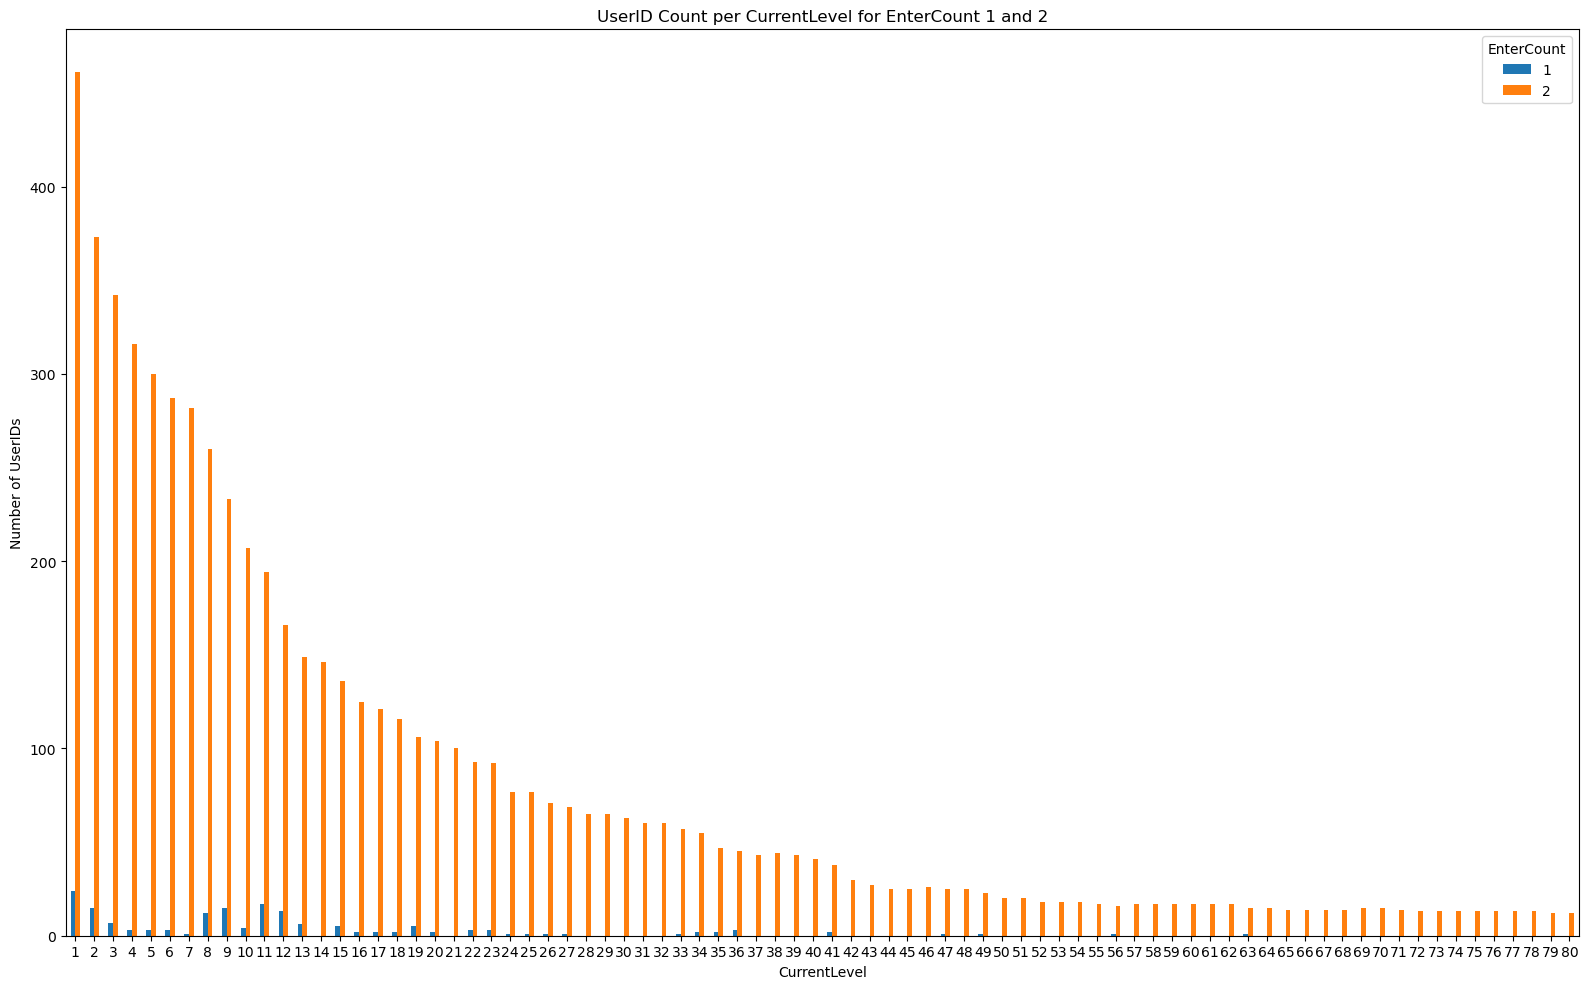

In [129]:
#关卡内流失

# 保留唯一关卡挑战记录-最晚记录

# 步骤2：按UserID和CurrentLevel分组，找到每组中LevelStartTime最晚的索引
idx = df.groupby(['UserID', 'CurrentLevel','State'])['LevelStartTime'].idxmax()

# 步骤3：使用idxmax得到的索引来获取最晚LevelStartTime的记录
latest_levels = df.loc[idx]

latest_levels.to_excel('levelchurn.xlsx', index=False)

# 按UserID和CurrentLevel分组计数
entered_counts = latest_levels.groupby(['UserID', 'CurrentLevel']).size().reset_index(name='EnterCount')


# 首先，我们需要根据EnterCount和CurrentLevel分组，并计算每个组的UserID数量
grouped = entered_counts.groupby(['EnterCount', 'CurrentLevel'])['UserID'].count()
grouped_df = grouped.reset_index(name='UserID_Count')

# 将上述DataFrame转换为可以绘图的格式，即每个CurrentLevel的EnterCount 1和EnterCount 2的UserID数量
pivot_table = grouped_df.pivot(index='CurrentLevel', columns='EnterCount', values='UserID_Count')

# 我们可以绘制这个DataFrame的柱状图

# 为了在图表中清晰地区分，我们为每个EnterCount的列设置不同的颜色
colors = ['blue', 'green']
bar_width = 2

# 步骤3：绘制柱状图
# 使用pivot_table的columns作为x轴的类别，绘制柱状图
pivot_table.plot(kind='bar', stacked=False, figsize=(16, 10))

# 添加图表标题和轴标签
plt.title('UserID Count per CurrentLevel for EnterCount 1 and 2')
plt.xlabel('CurrentLevel')
plt.ylabel('Number of UserIDs')
plt.xticks(rotation=0)  # 根据需要旋转X轴标签以便阅读

# 显示图例
plt.legend(title='EnterCount')

# 显示图表
plt.tight_layout()  # 调整布局以适应图例和标签
plt.show()

  UserID  CurrentLevel  EnterCount
0  2,503             9           1
1  2,504             2           1
2  2,513            23           2
3  2,513            24           2
4  2,513            25           2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UserID        6574 non-null   object
 1   CurrentLevel  6574 non-null   int64 
 2   EnterCount    6574 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 154.2+ KB
None


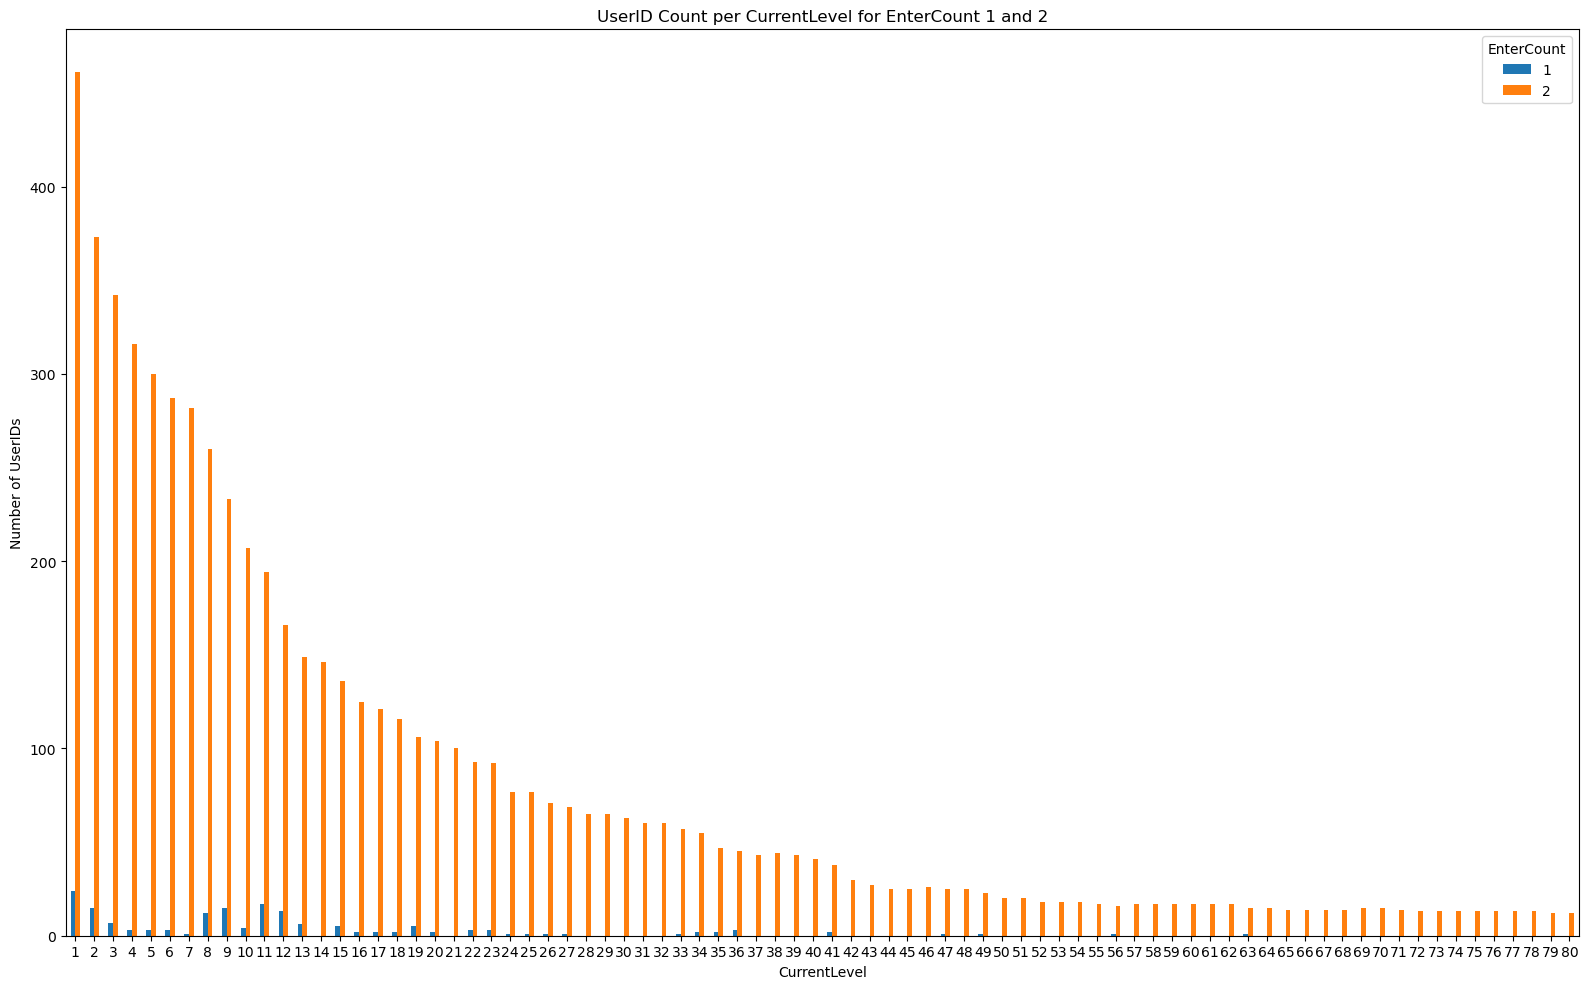

In [128]:

print(entered_counts.head())
print(entered_counts.info())


# 步骤3：绘制柱状图
# 使用pivot_table的columns作为x轴的类别，绘制柱状图
pivot_table.plot(kind='bar', stacked=False, figsize=(16, 10))

# 添加图表标题和轴标签
plt.title('UserID Count per CurrentLevel for EnterCount 1 and 2')
plt.xlabel('CurrentLevel')
plt.ylabel('Number of UserIDs')
plt.xticks(rotation=0)  # 根据需要旋转X轴标签以便阅读

# 显示图例
plt.legend(title='EnterCount')

# 显示图表
plt.tight_layout()  # 调整布局以适应图例和标签
plt.show()